# Julia Petrie

## Research question/interests

I am interested in understanding how the change in modern-day technology has affected high school graduation rates. Additionally, I am interested in the data surrounding cohorts as throughout my high school career I heard the term frequently but never fully understood the meaning or reason behind it. I am intrigued by the effect the curriculum can have on graduation rates.

# Task 1 - EDA

In [49]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables
import matplotlib.pyplot as plt
#index of all column titles

### This is our raw dataset:

In [50]:
df = pd.read_csv("../data/raw/Completion_Rate_residents_only_97-21.csv")
df

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,2020/2021,DISTRICT LEVEL,ALL STUDENTS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,217,185,35.196,100
55592,2020/2021,DISTRICT LEVEL,INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20,3.312,96.677
55593,2020/2021,DISTRICT LEVEL,NON INDIGENOUS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,193,165,31.884,100
55594,2020/2021,DISTRICT LEVEL,SPECIAL NEEDS,BC PUBLIC SCHOOL,93.0,Conseil scolaire francophone,ALL FACILITY TYPES,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,45,41,6.97,100


### Our raw dataset has 55596 rows and 13 columns:

In [51]:
df.shape

(55596, 13)

In [52]:
df.head()

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,PROVINCE LEVEL,ALL STUDENTS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014,5157.609,75.352
1,1997/1998,PROVINCE LEVEL,INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284,451.518,39.224
2,1997/1998,PROVINCE LEVEL,NON INDIGENOUS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730,4706.091,78.176
3,1997/1998,PROVINCE LEVEL,SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210,111.229,26.127
4,1997/1998,PROVINCE LEVEL,NON SPECIAL NEEDS,PROVINCE-TOTAL,NaN,NaN,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804,5046.381,76.244


### Listed below is each row of the dataset broken down - before eliminating columns:

In [53]:
list(df.columns) 

['YEAR_6_OF_COHORT',
 'DATA_LEVEL',
 'SUB_POPULATION',
 'PUBLIC_OR_INDEPENDENT',
 'DISTRICT_NUMBER',
 'DISTRICT_NAME',
 'FACILITY_TYPE',
 'COMPLETION_RATE_MODEL',
 'MODEL_TYPE',
 'COHORT_COUNT',
 'SUCCESS_COUNT',
 'ESTIMATED_OUTMIGRANTS',
 'ESTIMATED_COMPLETION_RATE']

#### Checking our dataset to make sure there are not duplicant values:

In [54]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


#### The list below demonstrates the unique values of our dataset:

In [55]:
df.nunique()

YEAR_6_OF_COHORT                24
DATA_LEVEL                       2
SUB_POPULATION                   5
PUBLIC_OR_INDEPENDENT            3
DISTRICT_NUMBER                 60
DISTRICT_NAME                   60
FACILITY_TYPE                    1
COMPLETION_RATE_MODEL            8
MODEL_TYPE                       2
COHORT_COUNT                  4908
SUCCESS_COUNT                 4928
ESTIMATED_OUTMIGRANTS        34589
ESTIMATED_COMPLETION_RATE    27168
dtype: int64

#### Below is all cohort years considered within our dataset:

In [56]:
df["YEAR_6_OF_COHORT"].unique()

array(['1997/1998', '1998/1999', '1999/2000', '2000/2001', '2001/2002',
       '2002/2003', '2003/2004', '2004/2005', '2005/2006', '2006/2007',
       '2007/2008', '2008/2009', '2009/2010', '2010/2011', '2011/2012',
       '2012/2013', '2013/2014', '2014/2015', '2015/2016', '2016/2017',
       '2017/2018', '2018/2019', '2019/2020', '2020/2021'], dtype=object)

#### Explain this later:

In [57]:
df["COMPLETION_RATE_MODEL"].unique()

array(['GRAD_7_YEAR EXTENDED_MODEL', 'GRAD_8_YEAR EXTENDED_MODEL',
       'SIX YEAR DOGWOOD COMPLETION RATE', 'PROG_2_YEAR SUB_MODEL',
       'PROG_3_YEAR SUB_MODEL', 'PROG_4_YEAR SUB_MODEL',
       'PROG_5_YEAR SUB_MODEL', 'GRAD_5_YEAR SUB_MODEL'], dtype=object)

#### The amount of students in each cohort:

In [58]:
df["COHORT_COUNT"].unique()

array(['50298', '3725', '46573', ..., '1935', '2618', '2481'],
      dtype=object)

#### For every student who completes a grade by following the criteria set for the cohort the score increases by one, if students do not satisfy the grading criteria, they are given a score of zero

In [59]:
df["SUCCESS_COUNT"].unique()

array(['34014', '1284', '32730', ..., '3293', '2214', '2130'],
      dtype=object)

#### Each district number below matches to a district name:

In [60]:
df["DISTRICT_NUMBER"].unique()

array([nan,  5.,  6.,  8., 10., 19., 20., 22., 23., 27., 28., 33., 34.,
       35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., 50., 51., 52., 53., 54., 57., 58., 59., 60., 61., 62.,
       63., 64., 67., 68., 69., 70., 71., 72., 73., 74., 75., 78., 79.,
       81., 82., 83., 84., 85., 87., 91., 92., 93.])

In [61]:
df["DISTRICT_NAME"].unique()

array([nan, 'Southeast Kootenay', 'Rocky Mountain', 'Kootenay Lake',
       'Arrow Lakes', 'Revelstoke', 'Kootenay-Columbia', 'Vernon',
       'Central Okanagan', 'Cariboo-Chilcotin', 'Quesnel', 'Chilliwack',
       'Abbotsford', 'Langley', 'Surrey', 'Delta', 'Richmond',
       'Vancouver', 'New Westminster', 'Burnaby',
       'Maple Ridge-Pitt Meadows', 'Coquitlam', 'North Vancouver',
       'West Vancouver', 'Sunshine Coast', 'Powell River', 'Sea to Sky',
       'Central Coast', 'Haida Gwaii', 'Boundary', 'Prince Rupert',
       'Okanagan Similkameen', 'Bulkley Valley', 'Prince George',
       'Nicola-Similkameen', 'Peace River South', 'Peace River North',
       'Greater Victoria', 'Sooke', 'Saanich', 'Gulf Islands',
       'Okanagan Skaha', 'Nanaimo-Ladysmith', 'Qualicum', 'Pacific Rim',
       'Comox Valley', 'Campbell River', 'Kamloops-Thompson',
       'Gold Trail', 'Mission', 'Fraser-Cascade', 'Cowichan Valley',
       'Fort Nelson', 'Coast Mountains', 'North Okanagan-Shuswap',

## IMPORTANT TO KNOW:
Through the process of adding graphs and visuals our group realized that our data was type(String), which made our data very difficult to visualize. To fix this problem we cleaned our data and removed Msk (masked) data - can be seen below. Then we were able to save the data using pandas to_csv() function. We believe this is changed our Strings to Int - making the data useable. From this point forward our data will be from our processed folder.

fig.1

<AxesSubplot:>

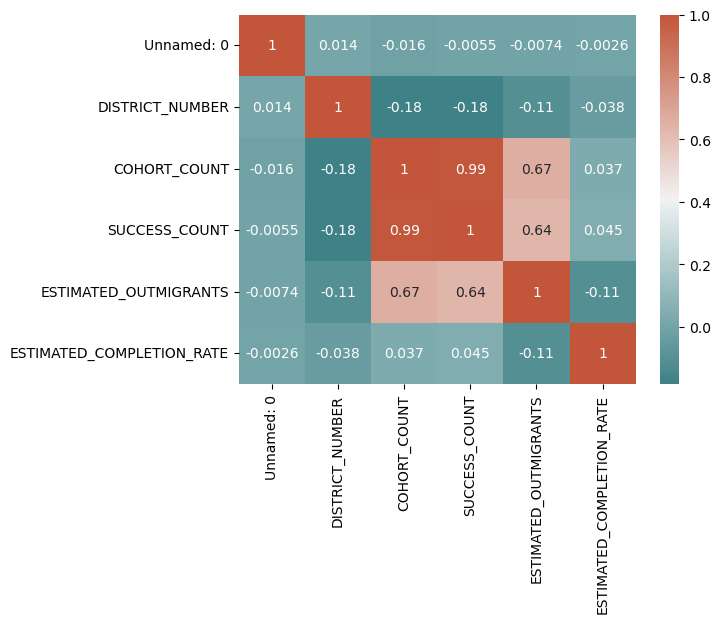

In [62]:
cdf = pd.read_csv("../data/processed/Completion_Rates_Clean.csv")
corr = cdf.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

### Fig.1 Explained:

From this graph I gather that there is a high correlation between SUCCESS_COUNT and COHORT_COUNT, I plan to develop this connection further.

fig.2

<AxesSubplot:xlabel='DISTRICT_NUMBER', ylabel='SUCCESS_COUNT'>

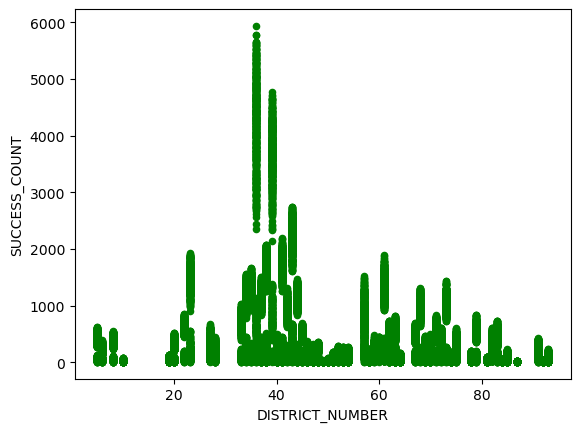

In [63]:
cdf.plot(kind='scatter', x='DISTRICT_NUMBER', y='SUCCESS_COUNT', color="green") 

### Fig.2 Explained:
This is another visual for showing the success of the students within a cohort compared the the district number the student is in, this allows us to consider geographical location in comparision to the success counts


fig.3

In [82]:
# g = sns.lmplot(
#     data=cdf,
#     x="SUCCESS_COUNT", colour = "green" y="COHORT_COUNT",
#     #height=5
)

SyntaxError: invalid syntax (3060992697.py, line 3)

# Task 2 - Analysis Pipeline

### Now that I have dissected data from each element of my interest I will now eliminate columns not listed above.

In [64]:
df = df.drop("DATA_LEVEL", axis=1)
df = df.drop("SUB_POPULATION", axis=1)
df = df.drop("PUBLIC_OR_INDEPENDENT", axis=1)
df = df.drop("FACILITY_TYPE", axis=1)
df = df.drop("ESTIMATED_OUTMIGRANTS", axis=1)
df = df.drop("ESTIMATED_COMPLETION_RATE", axis=1)
df


,YEAR_6_OF_COHORT,DISTRICT_NUMBER,DISTRICT_NAME,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT
0,1997/1998,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,50298,34014
1,1997/1998,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,3725,1284
2,1997/1998,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,46573,32730
3,1997/1998,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,915,210
4,1997/1998,NaN,NaN,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,49383,33804
...,...,...,...,...,...,...,...
55591,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,217,185
55592,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20
55593,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,193,165
55594,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,45,41


Eliminating columns that did not work towards my research question allowed me to narrow down my data set to from 13 columns to 7

### Then I will clean up my data and remove "NaN" and "Msk" from the table:

In [65]:
df = df[df[ 'DISTRICT_NAME'].str.contains( 'NaN' )== False]
df = df[df[ 'SUCCESS_COUNT'].str.contains( 'Msk' )== False]

df

,YEAR_6_OF_COHORT,DISTRICT_NUMBER,DISTRICT_NAME,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT
15,1997/1998,5.0,Southeast Kootenay,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,670,465
20,1997/1998,6.0,Rocky Mountain,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,369,239
25,1997/1998,8.0,Kootenay Lake,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,546,382
26,1997/1998,8.0,Kootenay Lake,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,27,10
27,1997/1998,8.0,Kootenay Lake,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,519,372
...,...,...,...,...,...,...,...
55591,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,217,185
55592,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20
55593,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,193,165
55594,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,45,41


After removing "NaN" and "Msk" from my data my dataset shrunk from 55596 rows to 47217 rows

### Renaming column names to make more sense:

In [70]:
df = df.rename(columns = {"YEAR_6_OF_COHORT" : "Year"}) 
df = df.rename(columns = {"DISTRICT_NUMBER" : "District_Number"})
df = df.rename(columns = {"DISTRICT_NAME" : "District_Name"})
df = df.rename(columns = {"COMPLETION_RATE_MODEL" : "Completion_Rate_Model"})
df = df.rename(columns = {"MODEL_TYPE" : "Learning_Model"}) 
df = df.rename(columns = {"MODEL_TYPE" : "Learning_Model"}) 
df = df.rename(columns = {"COHORT_COUNT" : "Cohort_Number"})
df = df.rename(columns = {"SUCCESS_COUNT" : "Success_Rate"})

df

,Year,District_Number,District_Name,Completion_Rate_Model,Learning_Model,Cohort_Number,Success_Rate
15,1997/1998,5.0,Southeast Kootenay,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,670,465
20,1997/1998,6.0,Rocky Mountain,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,369,239
25,1997/1998,8.0,Kootenay Lake,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,546,382
26,1997/1998,8.0,Kootenay Lake,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,27,10
27,1997/1998,8.0,Kootenay Lake,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,519,372
...,...,...,...,...,...,...,...
55591,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,217,185
55592,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,24,20
55593,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,193,165
55594,2020/2021,93.0,Conseil scolaire francophone,GRAD_5_YEAR SUB_MODEL,STATIC MODEL,45,41


# Task 3 - Method Chaining and Writing Methods in Python